<a href="https://colab.research.google.com/github/tamnhu2913/accenture-Data-Analytics-and-Visualization/blob/main/Task_3_Graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive

sns.set(color_codes = True)
drive.mount('/content/drive')

Mounted at /content/drive


# Loading data

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data/accenture Data Analytics/Data/Task 3_Final Content Data set.csv')
df.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [3]:
df.info()
df['Datetime'] = df['Datetime'].apply(pd.to_datetime)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24573 entries, 0 to 24572
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     24573 non-null  int64 
 1   Content ID     24573 non-null  object
 2   Reaction Type  24573 non-null  object
 3   Datetime       24573 non-null  object
 4   Content Type   24573 non-null  object
 5   Category       24573 non-null  object
 6   Sentiment      24573 non-null  object
 7   Score          24573 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 1.5+ MB


# Analysis data

## Top 5 categories

In [4]:
print('Number of unique categories: ', len(df['Category'].unique()))

Number of unique categories:  16


In [5]:
count_categories = df.groupby(['Category'])['Score'].sum().reset_index().sort_values(by='Score', ascending=False)
count_categories = count_categories[:5].reset_index(drop=True)
count_categories

,Category,Score
0,animals,74965
1,science,71168
2,healthy eating,69339
3,technology,68738
4,food,66676


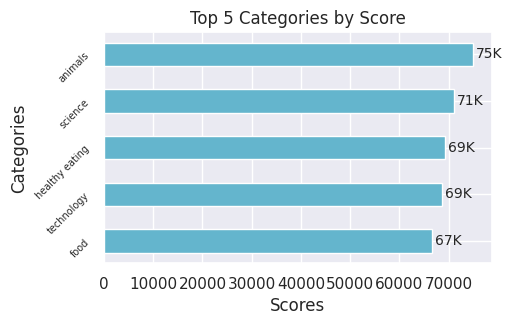

In [6]:
plt.figure(figsize=(5, 3))
plt.barh(count_categories['Category'], count_categories['Score'], color = 'c', height=0.5)

for index, value in enumerate(count_categories['Score']):
    n = int(round(value / 1000,0))
    plt.text(value+500, index, str(n) + 'K', va='center', fontsize = 10)

plt.title('Top 5 Categories by Score')
plt.xlabel('Scores')
plt.ylabel('Categories')
plt.yticks(rotation=45, fontsize = 7)
plt.gca().invert_yaxis()
plt.show()

In [7]:
per_categories = count_categories.copy()
per_categories['Score'] = count_categories['Score'] / count_categories['Score'].sum() * 100
per_categories = per_categories.rename(columns={'Score': 'Percentage'})
per_categories

,Category,Percentage
0,animals,21.364489
1,science,20.282371
2,healthy eating,19.761119
3,technology,19.589838
4,food,19.002183


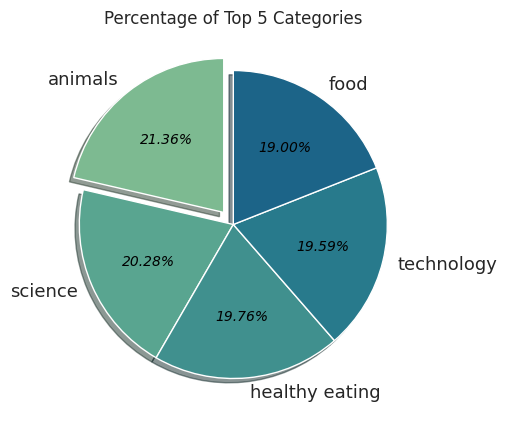

In [10]:
plt.figure(figsize = (5,5))
patches, texts, autotexts = plt.pie(per_categories['Percentage'], labels = per_categories['Category']
        , autopct = '%1.2f%%', textprops = {'fontsize': 13}, startangle=90
        , explode = (0.1,0,0,0,0), shadow = True, colors = sns.color_palette("crest"))

for auto in autotexts:
  auto.set_fontsize(10)
  auto.set_horizontalalignment('center')
  auto.set_fontstyle('italic')
  auto.set_color('black')

plt.title('Percentage of Top 5 Categories')
plt.show()

## Top Month with posts

In [11]:
df['Datetime'].dt.month.value_counts().reset_index()\
              .sort_values(by='count', ascending=False).rename(columns={'Datetime': 'Month', 'count': 'Total'})

,Month,Total
0,1,2142
1,7,2116
2,5,2110
3,12,2099
4,10,2087
5,6,2068
6,8,2055
7,11,2055
8,9,1991
9,3,1982


In [18]:
df['Datetime'].shape

(24573,)

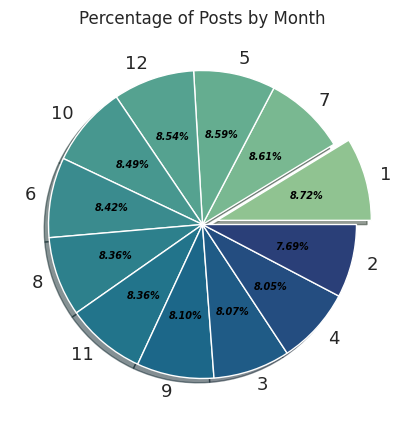

In [43]:
percent_month = df['Datetime'].dt.month.value_counts(normalize = True).mul(100).round(2).sort_values(ascending=False)
percent_month = percent_month.reset_index().rename(columns={'Datetime': 'Month', 'proportion': 'Percentage'})
percent_month

colors = sns.color_palette("crest", len(percent_month))

plt.figure(figsize = (5,5))
patches, texts, autotexts = plt.pie(percent_month['Percentage'], labels = percent_month['Month']
        , autopct = '%1.2f%%', textprops = {'fontsize': 13}, startangle=0
        , explode = (0.1,0,0,0,0,0,0,0,0,0,0,0), shadow = True, colors = colors)

for auto in autotexts:
  auto.set_fontsize(7)
  auto.set_horizontalalignment('center')
  auto.set_fontstyle('italic')
  auto.set_weight('bold')
  auto.set_color('black')

plt.title('Percentage of Posts by Month')
plt.show()